Frame -2 | Snake length: 6 | HUD: 73
Found via: slithers_search | Foods: 50


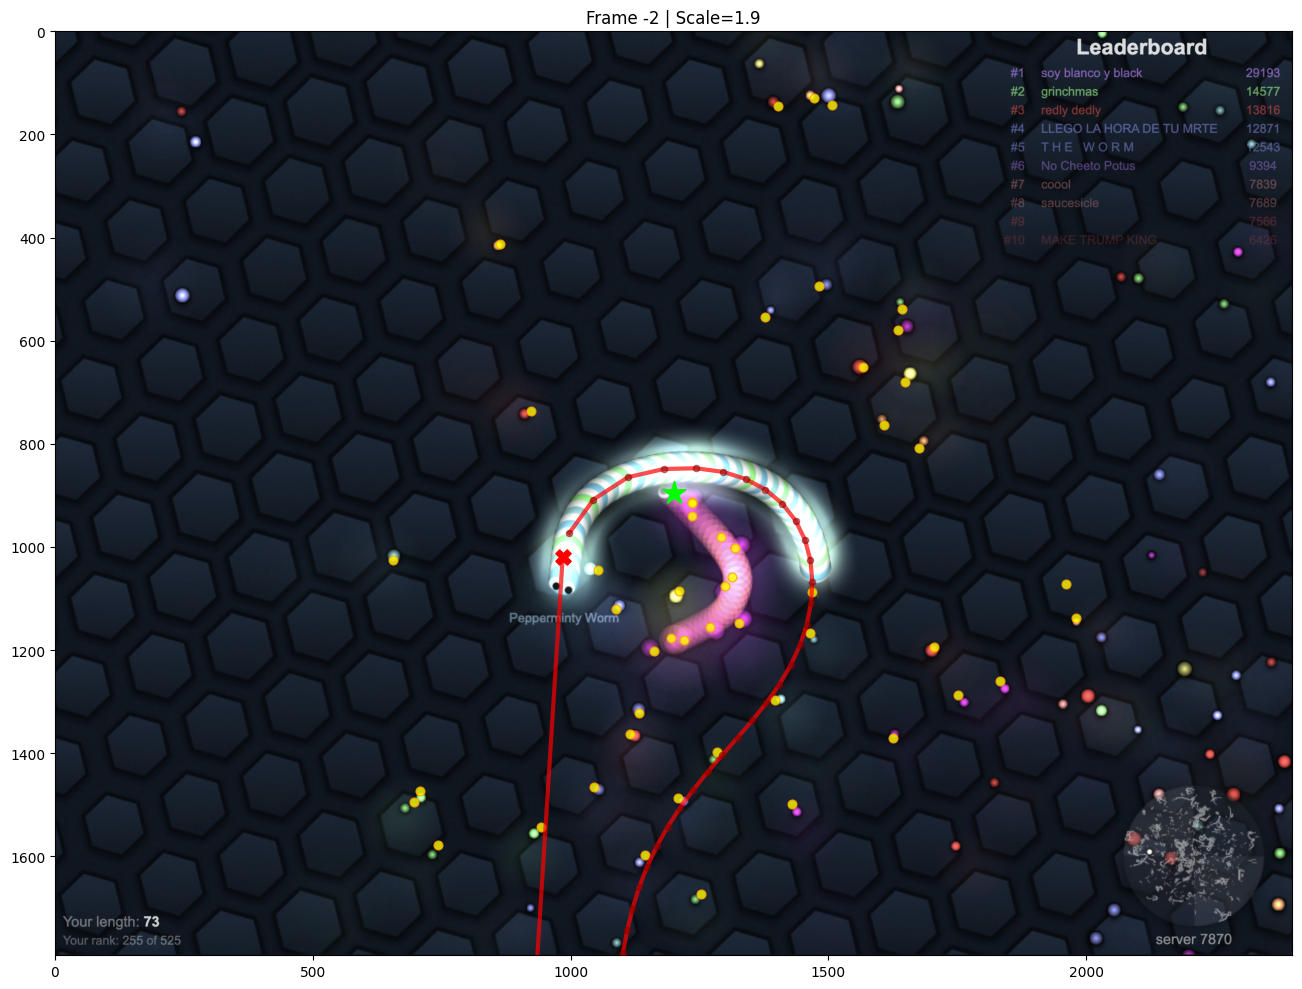

In [4]:
# Simple Slither.io Game State Visualizer
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
# === CONFIGURE THESE ===
GAME_FOLDER = "games/" + os.listdir("games")[-1]
FRAME_IDX = -2  # Which frame to visualize
SCALE = 1.90

# Load data
game_log = json.load(open(f"{GAME_FOLDER}/game_log.json"))
frame = game_log["frames"][FRAME_IDX]
gw = frame["game_world"]
img = Image.open(f"{GAME_FOLDER}/{frame['image_file']}")
img_w, img_h = img.size
cx, cy = img_w // 2, img_h // 2

# Reference point (our snake position)
snake = gw["snake"]
sx, sy = snake["x"], snake["y"]

print(f"Frame {FRAME_IDX} | Snake length: {snake['length']} | HUD: {frame['state']['snake_length']}")
print(f"Found via: {snake.get('found_via', 'unknown')} | Foods: {len(gw.get('foods', []))}")

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)
ax.set_xlim(0, img_w)
ax.set_ylim(img_h, 0)

# Foods (yellow)
for f in gw.get("foods", []):
    x = cx + (f["x"] - sx) * SCALE
    y = cy + (f["y"] - sy) * SCALE
    if 0 <= x <= img_w and 0 <= y <= img_h:
        ax.scatter(x, y, c='yellow', s=40, alpha=0.8, edgecolors='orange', linewidths=1)

# Other snakes (red X with body segments)
for s in gw.get("other_snakes", []):
    # Head position (actual head, not closest point)
    head_x = cx + (s["head_x"] - sx) * SCALE
    head_y = cy + (s["head_y"] - sy) * SCALE
    
    # Check if we have actual body segment data
    if "body_segments" in s and len(s["body_segments"]) > 0:
        # Plot actual body segments as a connected line
        seg_xs = [cx + (seg["x"] - sx) * SCALE for seg in s["body_segments"]]
        seg_ys = [cy + (seg["y"] - sy) * SCALE for seg in s["body_segments"]]
        
        # Add head position at the start for continuous line
        seg_xs = [head_x] + seg_xs
        seg_ys = [head_y] + seg_ys
        
        # Draw the body as a connected line
        ax.plot(seg_xs, seg_ys, 'r-', linewidth=3, alpha=0.7, zorder=5)
        
        # Also draw segment points for visibility
        for seg_x, seg_y in zip(seg_xs[1:], seg_ys[1:]):  # Skip head, draw body points
            if 0 <= seg_x <= img_w and 0 <= seg_y <= img_h:
                ax.scatter(seg_x, seg_y, c='darkred', s=20, alpha=0.5, zorder=5)
    else:
        # Fallback: Draw estimated body line extending from head in opposite direction of travel
        if "angle" in s and "length" in s:
            body_angle = s["angle"] + np.pi  # Opposite direction
            body_length = s["length"] * SCALE  # Scale the length to match screen coordinates
            
            # Calculate end point of body
            tail_x = head_x + np.cos(body_angle) * body_length
            tail_y = head_y + np.sin(body_angle) * body_length
            
            # Draw the body line
            ax.plot([head_x, tail_x], [head_y, tail_y], 'r-', linewidth=2, alpha=0.6, zorder=5)
    
    # Draw head marker
    if 0 <= head_x <= img_w and 0 <= head_y <= img_h:
        ax.scatter(head_x, head_y, c='red', s=120, marker='X', zorder=6)

# Our snake (green star at center)
ax.scatter(cx, cy, c='lime', s=300, marker='*', zorder=10)
ax.set_title(f"Frame {FRAME_IDX} | Scale={SCALE}")
plt.tight_layout()
plt.show()
